In [1]:
from matplotlib import font_manager

f_path = '/Library/Fonts/Arial Unicode.ttf'
font_manager.FontProperties(fname=f_path).get_name()

'Arial Unicode MS'

In [2]:
from matplotlib import rc

rc('font', family='Arial Unicode MS')

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from networkx.algorithms import bipartite, community
from networkx.algorithms.community import modularity
import matplotlib.colors as mcolors
from collections import Counter


Text(0.5, 1.0, '데이터')

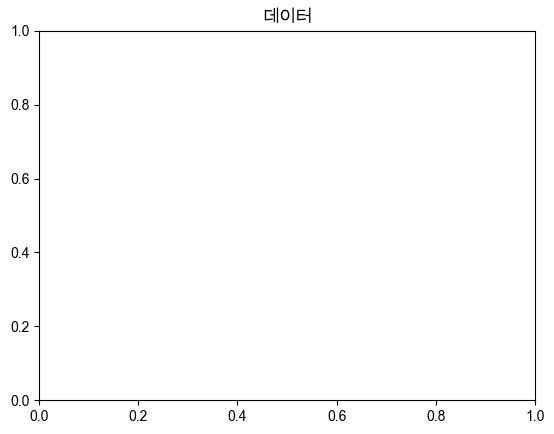

In [4]:
plt.title('데이터')

In [5]:
import pandas as pd

# 파일 읽기
file_path = '../local_data/sample_df.csv'
df = pd.read_csv(file_path)

# 데이터프레임에서 필요한 열만 추출
df['keywords'] = df['keywords'].apply(lambda x: x.strip("[]").split(", "))
df['keywords'] = df['keywords'].apply(lambda x: [k.strip("'") for k in x])


# # 데이터 확인
# print(df.head())


# HITS 알고리즘

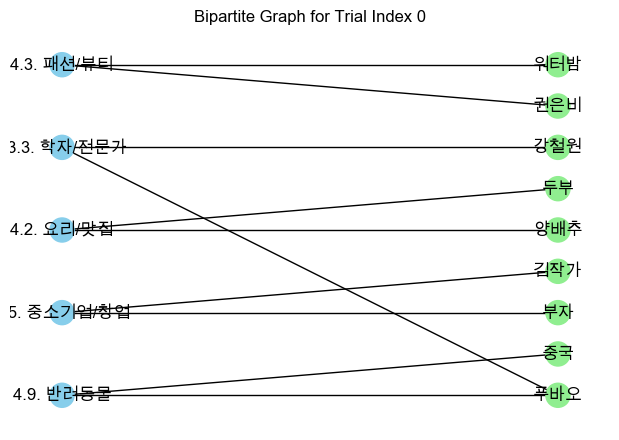

Authorities for Trial Index 0:
푸바오: 1.1093
강철원: 0.5547
중국: 0.5547
4.2. 요리/맛집: 0.0000
양배추: 0.0000
Hubs for Trial Index 0:
13.3. 학자/전문가: 1.8683
4.9. 반려동물: 1.8683
양배추: 0.0000
두부: 0.0000
4.2. 요리/맛집: 0.0000


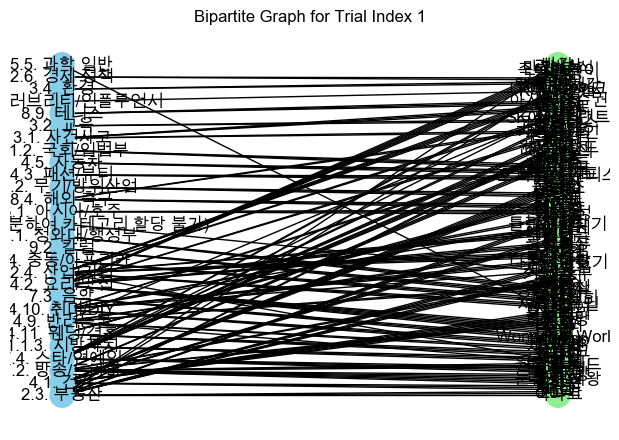

Authorities for Trial Index 1:
4.2. 요리/맛집: 0.1898
계란: 0.0405
과일가게: 0.0405
비법: 0.0405
멸치: 0.0405
Hubs for Trial Index 1:
4.2. 요리/맛집: 0.1759
부추: 0.0412
계란: 0.0412
요리: 0.0412
두릅: 0.0412


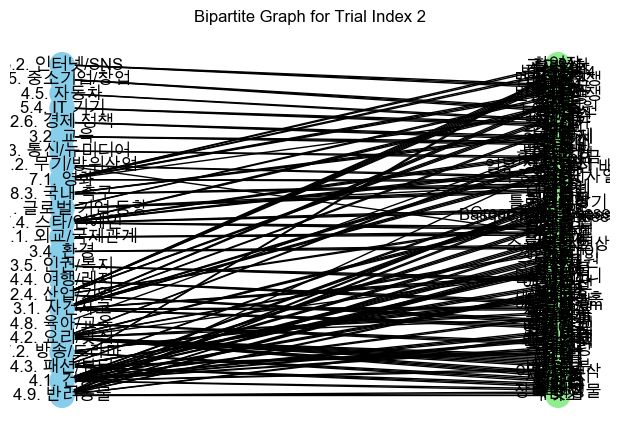

Authorities for Trial Index 2:
4.1. 건강: 1.0596
4.2. 요리/맛집: 0.0000
3.1. 사건사고: 0.0000
7.4. 스타/연예인: 0.0000
3.4. 환경: 0.0000
Hubs for Trial Index 2:
즉석 밥: 0.0313
혈당: 0.0313
암 치료: 0.0313
냉장고: 0.0313
린스: 0.0313


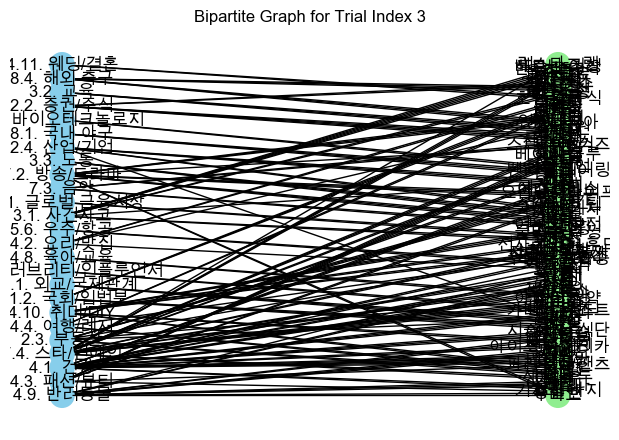

Authorities for Trial Index 3:
양택조: 0.0678
AFIC: 0.0678
뱃살: 0.0678
음식: 0.0678
양배추: 0.0678
Hubs for Trial Index 3:
팬티: 0.0422
손빨래: 0.0422
뱃살: 0.0422
내장지방: 0.0422
양택조: 0.0422


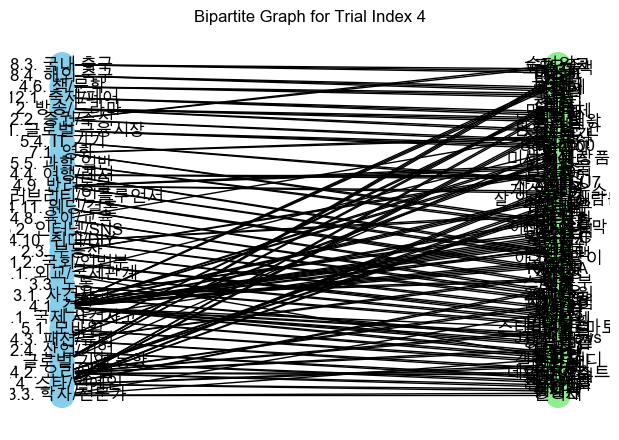

Authorities for Trial Index 4:
사망률: 0.0866
다이어트: 0.0866
알파벳 C: 0.0866
동작: 0.0866
감자: 0.0866
Hubs for Trial Index 4:
환혼단: 0.0329
명약: 0.0329
두릅: 0.0329
항암항염: 0.0329
장수 비결: 0.0329


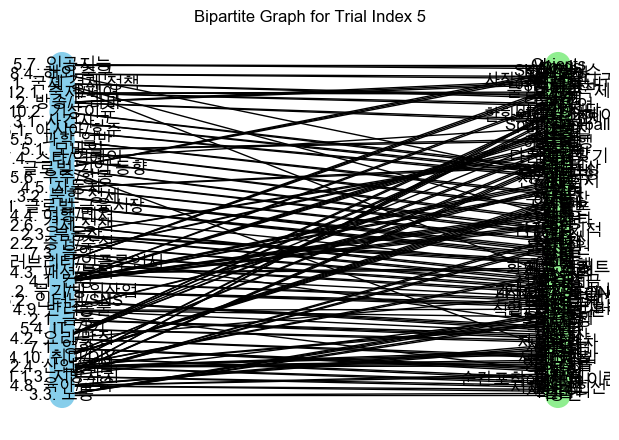

Authorities for Trial Index 5:
채소: 0.0510
동작: 0.0480
고기: 0.0480
대장균군: 0.0480
음식: 0.0480
Hubs for Trial Index 5:
4.1. 건강: 0.6171
2.6.1. 국제 경제 정책: 0.0386
채소: 0.0180
요거트: 0.0169
대장균군: 0.0169


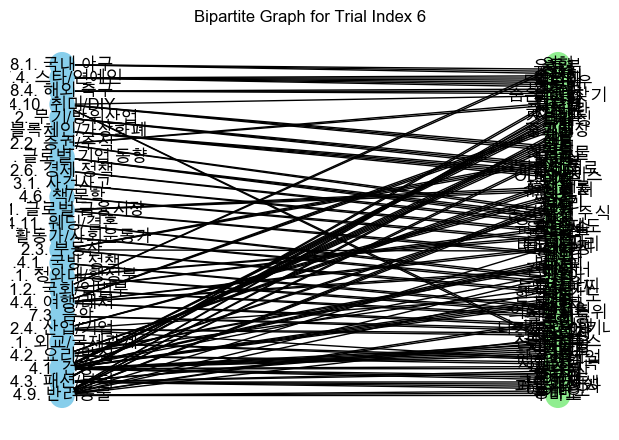

Authorities for Trial Index 6:
4.1. 건강: 0.3208
4.10. 취미/DIY: 0.0277
치매예방: 0.0240
두뇌운동: 0.0240
억만장자: 0.0221
Hubs for Trial Index 6:
4.1. 건강: 0.0633
치매예방: 0.0343
두뇌운동: 0.0343
다이어트: 0.0315
고구마: 0.0315


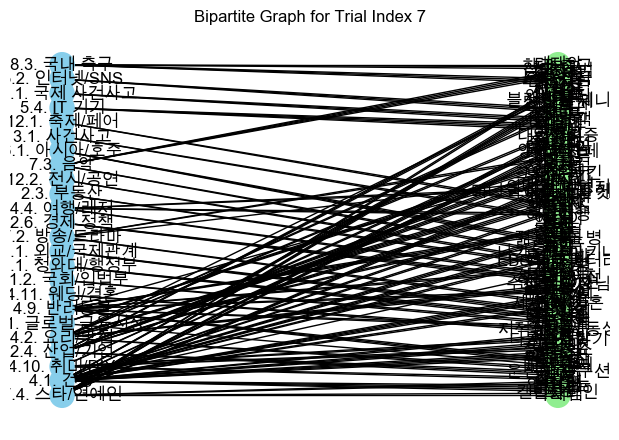

Authorities for Trial Index 7:
볶음밥: 0.0267
부상 방지: 0.0267
통귀리밥: 0.0267
운동: 0.0267
최보윤: 0.0267
Hubs for Trial Index 7:
4.1. 건강: 0.6777
운동: 0.0087
고기: 0.0087
볶음밥: 0.0087
알루미늄: 0.0087


In [9]:

# 날짜별로 데이터프레임 그룹화
grouped = df.groupby('trial_idx')

# 결과 저장을 위한 리스트
graphs = []

for trial_index, group in grouped:
    B = nx.Graph()
    
    # 카테고리와 키워드를 노드로 추가
    categories = group['category'].unique()
    keywords = sum(group['keywords'].tolist(), [])
    
    B.add_nodes_from(categories, bipartite=0)
    B.add_nodes_from(keywords, bipartite=1)
    
    # 카테고리와 키워드 간의 간선을 추가
    for _, row in group.iterrows():
        category = row['category']
        for keyword in row['keywords']:
            B.add_edge(category, keyword)
    
    graphs.append((trial_index, B))
    
    # 그래프 그리기
    pos = nx.drawing.layout.bipartite_layout(B, categories)
    plt.figure(figsize=(6, 4))
    nx.draw(B, pos, with_labels=True, 
            node_color=['skyblue' if n in categories else 'lightgreen' for n in B.nodes()],
            font_family='Arial Unicode MS')
    plt.title(f'Bipartite Graph for Trial Index {trial_index}')
    plt.show()

    # Authority 노드 및 Hub 노드 찾기 (HITS 알고리즘 이용)
    hubs, authorities = nx.hits(B)
    top_authorities = sorted(authorities.items(), key=lambda x: x[1], reverse=True)[:5]
    top_hubs = sorted(hubs.items(), key=lambda x: x[1], reverse=True)[:5]

    print(f"Authorities for Trial Index {trial_index}:")
    for node, score in top_authorities:
        print(f"{node}: {score:.4f}")

    print(f"Hubs for Trial Index {trial_index}:")
    for node, score in top_hubs:
        print(f"{node}: {score:.4f}")

# 필요시 전체 결과를 하나의 DataFrame으로 합쳐서 분석할 수 있습니다.


# 커뮤니티 탐색

In [ ]:
# 날짜별로 데이터프레임 그룹화
grouped = df.groupby('trial_idx')

# 결과 저장을 위한 리스트
graphs = []

for trial_index, group in grouped:
    B = nx.Graph()
    
    # 카테고리와 키워드를 노드로 추가
    categories = group['category'].unique()
    keywords = sum(group['keywords'].tolist(), [])
    
    B.add_nodes_from(categories, bipartite=0)
    B.add_nodes_from(keywords, bipartite=1)
    
    # 카테고리와 키워드 간의 간선을 추가
    for _, row in group.iterrows():
        category = row['category']
        for keyword in row['keywords']:
            B.add_edge(category, keyword)
    
    graphs.append((trial_index, B))
    
    # 그래프 그리기
    pos = nx.drawing.layout.bipartite_layout(B, categories)
    plt.figure(figsize=(12, 8))
    nx.draw(B, pos, with_labels=True, 
            node_color=['skyblue' if n in categories else 'lightgreen' for n in B.nodes()],
            font_family='Arial Unicode MS')
    plt.title(f'Bipartite Graph for Trial Index {trial_index}')
    plt.show()

    # Authority 노드 및 Hub 노드 찾기 (HITS 알고리즘 이용)
    hubs, authorities = nx.hits(B)
    top_authorities = sorted(authorities.items(), key=lambda x: x[1], reverse=True)[:5]
    top_hubs = sorted(hubs.items(), key=lambda x: x[1], reverse=True)[:5]

    print(f"Authorities for Trial Index {trial_index}:")
    for node, score in top_authorities:
        print(f"{node}: {score:.4f}")

    print(f"Hubs for Trial Index {trial_index}:")
    for node, score in top_hubs:
        print(f"{node}: {score:.4f}")

    # 카테고리 노드들의 projected graph 생성
    category_nodes = set(categories)
    projected_graph = bipartite.projected_graph(B, category_nodes)
    
    # 커뮤니티 탐지
    communities = community.greedy_modularity_communities(projected_graph)
    
    # 커뮤니티 탐지 (Louvain Method 사용)
    louvain_communities = community.louvain_communities(projected_graph)
    
    # 커뮤니티 결과 출력
    print(f"Communities for Trial Index {trial_index}:")
    for i, comm in enumerate(louvain_communities):
        print(f"Community {i + 1}: {', '.join(comm)}")

# 필요시 전체 결과를 하나의 DataFrame으로 합쳐서 분석할 수 있습니다.


# n-th order neighbor 개념으로 탐색

In [ ]:
# 날짜별로 데이터프레임 그룹화
grouped = df.groupby('trial_idx')

# 결과 저장을 위한 리스트
graphs = []
n = 8

for trial_index, group in grouped:
    B = nx.Graph()
    
    # 카테고리와 키워드를 노드로 추가
    categories = group['category'].unique()
    keywords = sum(group['keywords'].tolist(), [])
    
    B.add_nodes_from(categories, bipartite=0)
    B.add_nodes_from(keywords, bipartite=1)
    
    # 카테고리와 키워드 간의 간선을 추가
    for _, row in group.iterrows():
        category = row['category']
        for keyword in row['keywords']:
            B.add_edge(category, keyword)
    
    graphs.append((trial_index, B))
    
    # 그래프 그리기
    pos = nx.drawing.layout.bipartite_layout(B, categories)
    plt.figure(figsize=(6, 4))
    nx.draw(B, pos, with_labels=True, 
            node_color=['skyblue' if n in categories else 'lightgreen' for n in B.nodes()],
            font_family='Arial Unicode MS')
    plt.title(f'Bipartite Graph for Trial Index {trial_index}')
    plt.show()

    # Authority 노드 및 Hub 노드 찾기 (HITS 알고리즘 이용)
    hubs, authorities = nx.hits(B)
    top_authorities = sorted(authorities.items(), key=lambda x: x[1], reverse=True)[:5]
    top_hubs = sorted(hubs.items(), key=lambda x: x[1], reverse=True)[:5]

    print(f"Authorities for Trial Index {trial_index}:")
    for node, score in top_authorities:
        print(f"{node}: {score:.4f}")

    print(f"Hubs for Trial Index {trial_index}:")
    for node, score in top_hubs:
        print(f"{node}: {score:.4f}")

    # 카테고리 노드들의 n-th order neighbors 기반으로 projected graph 생성
    category_nodes = set(categories)
    projected_graph = nx.Graph()
    projected_graph.add_nodes_from(category_nodes)

    # 모든 카테고리 노드에 대해 n-th order neighbors 찾기
    for category in category_nodes:
        # BFS로 n-th order neighbors 찾기
        lengths = nx.single_source_shortest_path_length(B, category, cutoff=n)
        for target, length in lengths.items():
            if target in category_nodes and category != target:
                if projected_graph.has_edge(category, target):
                    projected_graph[category][target]['weight'] += 1
                else:
                    projected_graph.add_edge(category, target, weight=1)
    
    # 커뮤니티 탐지 (Louvain Method 사용)
    louvain_communities = community.louvain_communities(projected_graph)
    
    # 커뮤니티 중요도 계산 및 결과 출력
    print(f"Communities for Trial Index {trial_index}:")

    community_scores = []
    for i, comm in enumerate(louvain_communities):
        comm_nodes = list(comm)
        subgraph = projected_graph.subgraph(comm_nodes)
        size = len(comm_nodes)
        density = nx.density(subgraph)
        # comm_modularity = modularity(projected_graph, [comm])

        # 커뮤니티에 연결된 키워드 수 계산
        connected_keywords = set()
        for category in comm_nodes:
            connected_keywords.update(B.neighbors(category))
        keyword_count = len(connected_keywords)
        keyword_ratio = keyword_count / len(keywords)

        community_scores.append({
            'Community': i + 1,
            'Size': size,
            'Density': density,
            'Modularity': 0.0, #comm_modularity,
            'Keyword Count': keyword_count,
            'Keyword Ratio': keyword_ratio,
            'Nodes': comm_nodes
        })

    # 중요도에 따라 정렬하여 출력
    sorted_communities = sorted(community_scores, key=lambda x: (x['Keyword Count'], x['Density'], x['Modularity']), reverse=True)
    for comm in sorted_communities:
        print(f"Community {comm['Community']}: Size={comm['Size']}, Density={comm['Density']:.4f}, Modularity={comm['Modularity']:.4f}, Keyword Count={comm['Keyword Count']}, Keyword Ratio={comm['Keyword Ratio']:.4f}")
        print(f"Nodes: {', '.join(comm['Nodes'])}")
        
    # 프로젝트 그래프 그리기
    pos = nx.spring_layout(projected_graph)
    plt.figure(figsize=(12, 8))

    # 커뮤니티 별 색상 설정
    colors = list(mcolors.TABLEAU_COLORS.values())
    node_colors = []
    node_sizes = []
    for node in projected_graph.nodes():
        for i, comm in enumerate(sorted_communities):
            if node in comm['Nodes']:
                node_colors.append(colors[i % len(colors)])
                node_sizes.append(comm['Keyword Count'] * 100)  # 커뮤니티에 연결된 키워드 수에 따라 크기 조절

    nx.draw(projected_graph, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, edge_color='gray',font_family='Arial Unicode MS')
    plt.title(f'Projected Graph for Trial Index {trial_index}')
    plt.show()

# 폴리싱 코드

Communities for Trial Index 0:
Community 2: Size=2, Density=1.0000, Keyword Count=3, Keyword Ratio=0.3000
Nodes: 4.9. 반려동물, 13.3. 학자/전문가
  4.9. 반려동물: Authority=1.4182, Rank=1
  13.3. 학자/전문가: Authority=1.4182, Rank=2
Community 1: Size=1, Density=0.0000, Keyword Count=2, Keyword Ratio=0.2000
Nodes: 2.5. 중소기업/창업
  2.5. 중소기업/창업: Authority=-0.0000, Rank=1
Community 3: Size=1, Density=0.0000, Keyword Count=2, Keyword Ratio=0.2000
Nodes: 4.2. 요리/맛집
  4.2. 요리/맛집: Authority=-0.0000, Rank=1
Community 4: Size=1, Density=0.0000, Keyword Count=2, Keyword Ratio=0.2000
Nodes: 4.3. 패션/뷰티
  4.3. 패션/뷰티: Authority=-0.0000, Rank=1


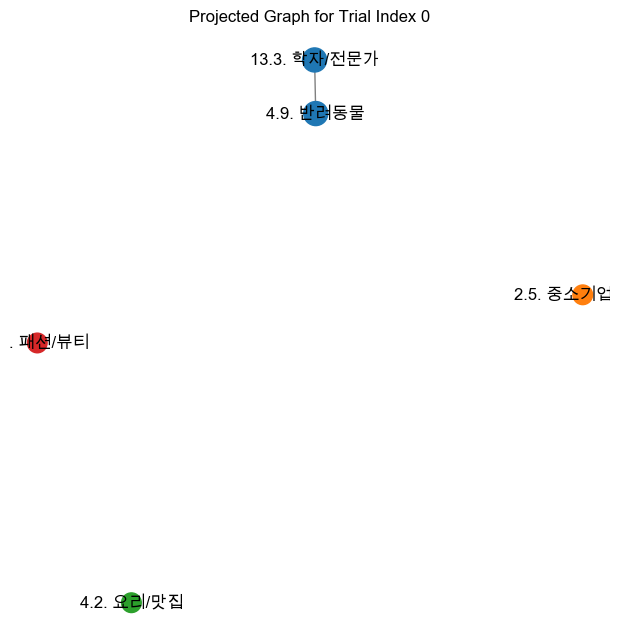

Communities for Trial Index 1:
Community 2: Size=2, Density=1.0000, Keyword Count=31, Keyword Ratio=0.1590
Nodes: 7.2. 방송/드라마, 7.4. 스타/연예인
  7.4. 스타/연예인: Authority=-0.0000, Rank=1
  7.2. 방송/드라마: Authority=-0.0000, Rank=2
Community 10: Size=3, Density=1.0000, Keyword Count=25, Keyword Ratio=0.1282
Nodes: 2.4. 산업/기업, 4.9. 반려동물, 1.1.3. 지방자치
  2.4. 산업/기업: Authority=0.0000, Rank=1
  1.1.3. 지방자치: Authority=0.0000, Rank=2
  4.9. 반려동물: Authority=-0.0000, Rank=3
Community 3: Size=1, Density=0.0000, Keyword Count=20, Keyword Ratio=0.1026
Nodes: 4.2. 요리/맛집
  4.2. 요리/맛집: Authority=1.0940, Rank=1
Community 22: Size=2, Density=1.0000, Keyword Count=18, Keyword Ratio=0.0923
Nodes: 4.1. 건강, 5.5. 과학 일반
  5.5. 과학 일반: Authority=0.0000, Rank=1
  4.1. 건강: Authority=-0.0000, Rank=2
Community 8: Size=1, Density=0.0000, Keyword Count=16, Keyword Ratio=0.0821
Nodes: 2.3. 부동산
  2.3. 부동산: Authority=-0.0000, Rank=1
Community 12: Size=1, Density=0.0000, Keyword Count=12, Keyword Ratio=0.0615
Nodes: 4.10. 취미/DIY
  

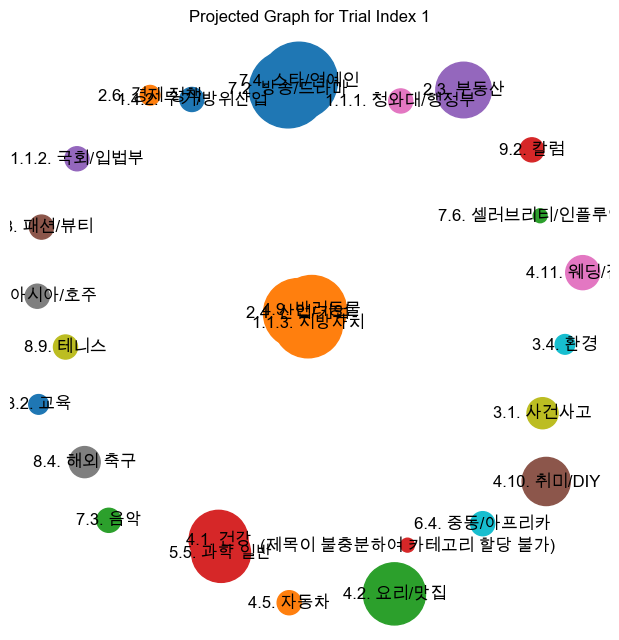

Communities for Trial Index 2:
Community 22: Size=1, Density=0.0000, Keyword Count=32, Keyword Ratio=0.1524
Nodes: 4.1. 건강
  4.1. 건강: Authority=0.2728, Rank=1
Community 4: Size=1, Density=0.0000, Keyword Count=23, Keyword Ratio=0.1095
Nodes: 4.2. 요리/맛집
  4.2. 요리/맛집: Authority=0.0000, Rank=1
Community 7: Size=1, Density=0.0000, Keyword Count=20, Keyword Ratio=0.0952
Nodes: 3.1. 사건사고
  3.1. 사건사고: Authority=0.0000, Rank=1
Community 11: Size=1, Density=0.0000, Keyword Count=18, Keyword Ratio=0.0857
Nodes: 4.9. 반려동물
  4.9. 반려동물: Authority=-0.0000, Rank=1
Community 15: Size=1, Density=0.0000, Keyword Count=15, Keyword Ratio=0.0714
Nodes: 7.4. 스타/연예인
  7.4. 스타/연예인: Authority=-0.0000, Rank=1
Community 14: Size=1, Density=0.0000, Keyword Count=14, Keyword Ratio=0.0667
Nodes: 2.4. 산업/기업
  2.4. 산업/기업: Authority=0.0000, Rank=1
Community 16: Size=1, Density=0.0000, Keyword Count=13, Keyword Ratio=0.0619
Nodes: 4.3. 패션/뷰티
  4.3. 패션/뷰티: Authority=0.0000, Rank=1
Community 17: Size=2, Density=1.0000, K

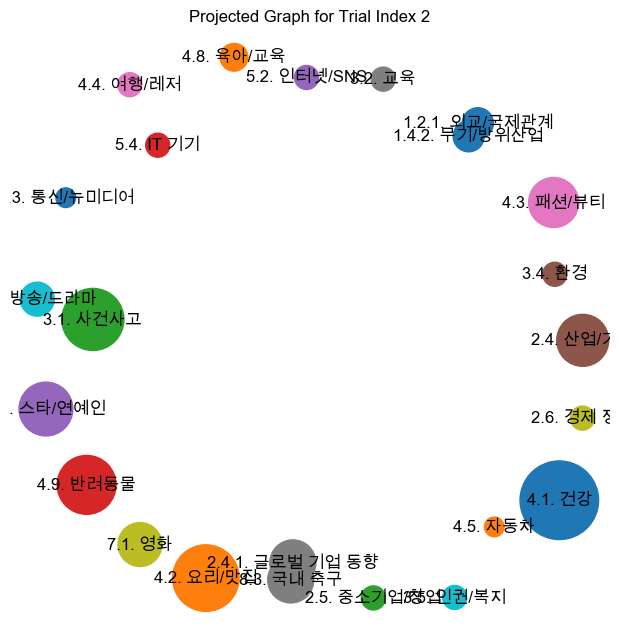

Communities for Trial Index 3:
Community 4: Size=5, Density=1.0000, Keyword Count=28, Keyword Ratio=0.1547
Nodes: 2.4. 산업/기업, 3.1. 사건사고, 2.3. 부동산, 1.2.1. 외교/국제관계, 4.4. 여행/레저
  1.2.1. 외교/국제관계: Authority=-0.0000, Rank=1
  2.4. 산업/기업: Authority=-0.0000, Rank=2
  4.4. 여행/레저: Authority=-0.0000, Rank=3
  2.3. 부동산: Authority=-0.0000, Rank=4
  3.1. 사건사고: Authority=-0.0000, Rank=5
Community 20: Size=1, Density=0.0000, Keyword Count=26, Keyword Ratio=0.1436
Nodes: 4.1. 건강
  4.1. 건강: Authority=1.1698, Rank=1
Community 7: Size=2, Density=1.0000, Keyword Count=23, Keyword Ratio=0.1271
Nodes: 7.2. 방송/드라마, 4.9. 반려동물
  7.2. 방송/드라마: Authority=0.0000, Rank=1
  4.9. 반려동물: Authority=-0.0000, Rank=2
Community 15: Size=1, Density=0.0000, Keyword Count=23, Keyword Ratio=0.1271
Nodes: 7.4. 스타/연예인
  7.4. 스타/연예인: Authority=0.0000, Rank=1
Community 8: Size=1, Density=0.0000, Keyword Count=11, Keyword Ratio=0.0608
Nodes: 4.10. 취미/DIY
  4.10. 취미/DIY: Authority=0.0000, Rank=1
Community 16: Size=1, Density=0.0000, K

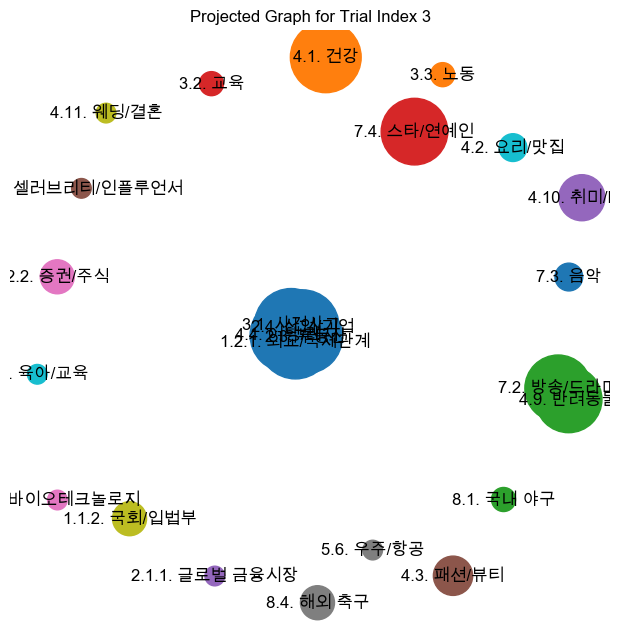

Communities for Trial Index 4:
Community 28: Size=1, Density=0.0000, Keyword Count=32, Keyword Ratio=0.1860
Nodes: 4.1. 건강
  4.1. 건강: Authority=0.3296, Rank=1
Community 21: Size=1, Density=0.0000, Keyword Count=16, Keyword Ratio=0.0930
Nodes: 7.4. 스타/연예인
  7.4. 스타/연예인: Authority=0.0000, Rank=1
Community 5: Size=1, Density=0.0000, Keyword Count=14, Keyword Ratio=0.0814
Nodes: 4.2. 요리/맛집
  4.2. 요리/맛집: Authority=-0.0000, Rank=1
Community 24: Size=2, Density=1.0000, Keyword Count=10, Keyword Ratio=0.0581
Nodes: 2.4.1. 글로벌 기업 동향, 2.1.1. 글로벌 금융시장
  2.4.1. 글로벌 기업 동향: Authority=0.0000, Rank=1
  2.1.1. 글로벌 금융시장: Authority=-0.0000, Rank=2
Community 6: Size=3, Density=1.0000, Keyword Count=9, Keyword Ratio=0.0523
Nodes: 3.1.1. 국제 사건사고, 1.2.1. 외교/국제관계, 13.3. 학자/전문가
  13.3. 학자/전문가: Authority=0.0000, Rank=1
  3.1.1. 국제 사건사고: Authority=-0.0000, Rank=2
  1.2.1. 외교/국제관계: Authority=-0.0000, Rank=3
Community 23: Size=1, Density=0.0000, Keyword Count=8, Keyword Ratio=0.0465
Nodes: 4.3. 패션/뷰티
  4.3. 패션/뷰티:

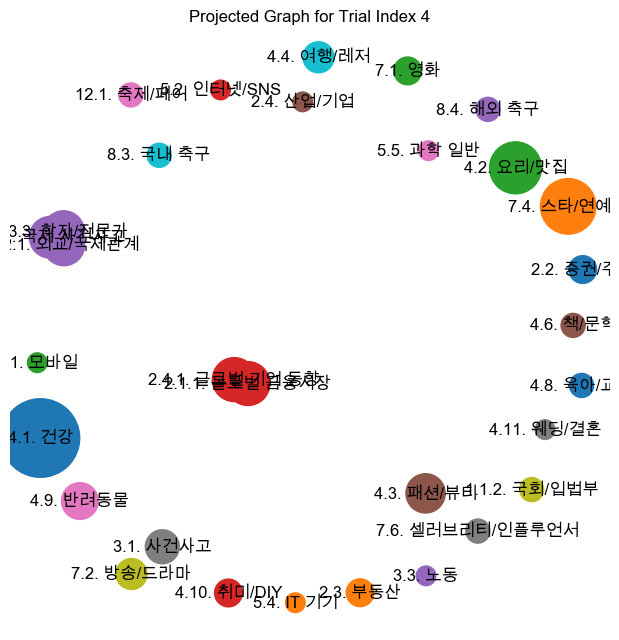

Communities for Trial Index 5:
Community 13: Size=3, Density=1.0000, Keyword Count=24, Keyword Ratio=0.1290
Nodes: 2.4. 산업/기업, 2.4.1. 글로벌 기업 동향, 7.3. 음악
  2.4.1. 글로벌 기업 동향: Authority=0.0000, Rank=1
  7.3. 음악: Authority=-0.0000, Rank=2
  2.4. 산업/기업: Authority=-0.0000, Rank=3
Community 15: Size=3, Density=1.0000, Keyword Count=24, Keyword Ratio=0.1290
Nodes: 2.6. 경제 정책, 4.1. 건강, 2.6.1. 국제 경제 정책
  2.6. 경제 정책: Authority=-0.0010, Rank=1
  2.6.1. 국제 경제 정책: Authority=-0.0187, Rank=2
  4.1. 건강: Authority=-0.2999, Rank=3
Community 11: Size=2, Density=1.0000, Keyword Count=18, Keyword Ratio=0.0968
Nodes: 1.1.3. 지방자치, 3.3. 노동
  1.1.3. 지방자치: Authority=0.0000, Rank=1
  3.3. 노동: Authority=0.0000, Rank=2
Community 4: Size=1, Density=0.0000, Keyword Count=10, Keyword Ratio=0.0538
Nodes: 4.2. 요리/맛집
  4.2. 요리/맛집: Authority=0.0000, Rank=1
Community 16: Size=1, Density=0.0000, Keyword Count=9, Keyword Ratio=0.0484
Nodes: 4.10. 취미/DIY
  4.10. 취미/DIY: Authority=-0.0000, Rank=1
Community 14: Size=2, Density=

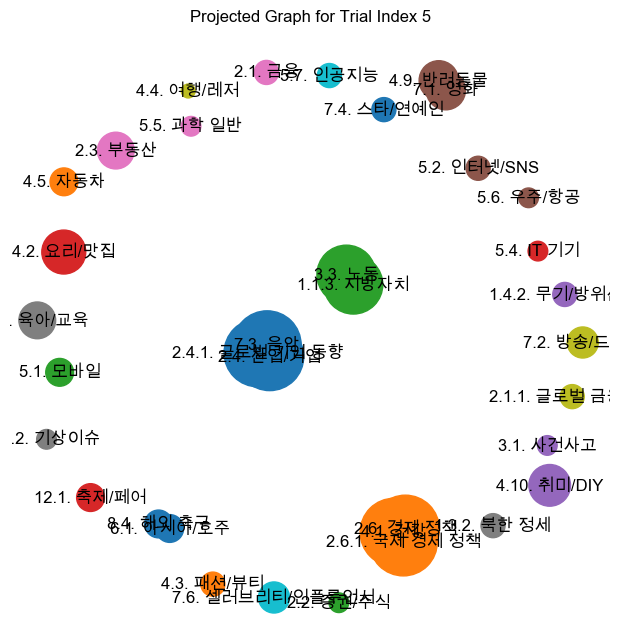

Communities for Trial Index 6:
Community 11: Size=2, Density=1.0000, Keyword Count=33, Keyword Ratio=0.1976
Nodes: 4.10. 취미/DIY, 4.1. 건강
  4.1. 건강: Authority=0.0083, Rank=1
  4.10. 취미/DIY: Authority=0.0007, Rank=2
Community 10: Size=1, Density=0.0000, Keyword Count=18, Keyword Ratio=0.1078
Nodes: 4.9. 반려동물
  4.9. 반려동물: Authority=0.0000, Rank=1
Community 18: Size=1, Density=0.0000, Keyword Count=13, Keyword Ratio=0.0778
Nodes: 4.3. 패션/뷰티
  4.3. 패션/뷰티: Authority=0.0000, Rank=1
Community 14: Size=1, Density=0.0000, Keyword Count=9, Keyword Ratio=0.0539
Nodes: 4.4. 여행/레저
  4.4. 여행/레저: Authority=-0.0000, Rank=1
Community 15: Size=2, Density=1.0000, Keyword Count=8, Keyword Ratio=0.0479
Nodes: 2.4. 산업/기업, 1.2.1. 외교/국제관계
  1.2.1. 외교/국제관계: Authority=0.0000, Rank=1
  2.4. 산업/기업: Authority=-0.0000, Rank=2
Community 3: Size=1, Density=0.0000, Keyword Count=8, Keyword Ratio=0.0479
Nodes: 4.2. 요리/맛집
  4.2. 요리/맛집: Authority=-0.0000, Rank=1
Community 7: Size=1, Density=0.0000, Keyword Count=6, Keywor

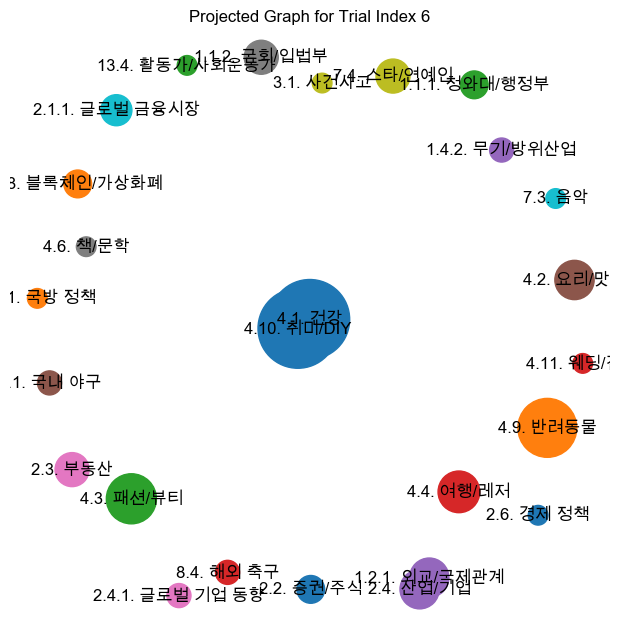

Communities for Trial Index 7:
Community 24: Size=1, Density=0.0000, Keyword Count=37, Keyword Ratio=0.2114
Nodes: 4.1. 건강
  4.1. 건강: Authority=1.7458, Rank=1
Community 17: Size=1, Density=0.0000, Keyword Count=18, Keyword Ratio=0.1029
Nodes: 7.4. 스타/연예인
  7.4. 스타/연예인: Authority=-0.0000, Rank=1
Community 3: Size=1, Density=0.0000, Keyword Count=16, Keyword Ratio=0.0914
Nodes: 4.2. 요리/맛집
  4.2. 요리/맛집: Authority=-0.0000, Rank=1
Community 15: Size=1, Density=0.0000, Keyword Count=15, Keyword Ratio=0.0857
Nodes: 2.4. 산업/기업
  2.4. 산업/기업: Authority=0.0000, Rank=1
Community 10: Size=1, Density=0.0000, Keyword Count=13, Keyword Ratio=0.0743
Nodes: 4.9. 반려동물
  4.9. 반려동물: Authority=0.0000, Rank=1
Community 12: Size=1, Density=0.0000, Keyword Count=8, Keyword Ratio=0.0457
Nodes: 4.10. 취미/DIY
  4.10. 취미/DIY: Authority=0.0000, Rank=1
Community 11: Size=1, Density=0.0000, Keyword Count=6, Keyword Ratio=0.0343
Nodes: 7.3. 음악
  7.3. 음악: Authority=-0.0000, Rank=1
Community 14: Size=1, Density=0.0000, K

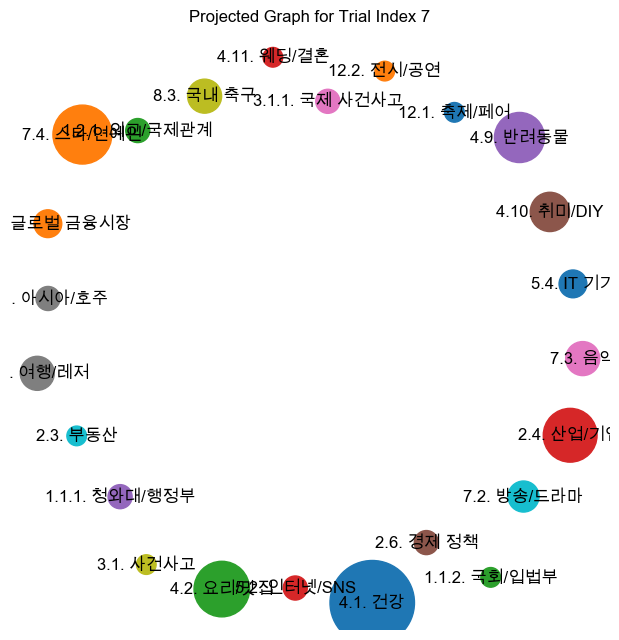

In [6]:
# 날짜별로 데이터프레임 그룹화
grouped = df.groupby('trial_idx')

# 결과 저장을 위한 리스트
graphs = []
n = 8  # n-th order neighbors (짝수로 설정)

for trial_index, group in grouped:
    B = nx.Graph()
    
    # 카테고리와 키워드를 노드로 추가
    categories = group['category'].unique()
    keywords = sum(group['keywords'].tolist(), [])
    
    B.add_nodes_from(categories, bipartite=0)
    B.add_nodes_from(keywords, bipartite=1)
    
    # 카테고리와 키워드 간의 간선을 추가
    for _, row in group.iterrows():
        category = row['category']
        for keyword in row['keywords']:
            B.add_edge(category, keyword)
    
    graphs.append((trial_index, B))
    
    # HITS 알고리즘을 사용하여 Authority 점수 계산
    hubs, authorities = nx.hits(B)
    sorted_authorities = sorted(authorities.items(), key=lambda x: x[1], reverse=True)
    
    # 카테고리 노드들의 n-th order neighbors 기반으로 projected graph 생성
    category_nodes = set(categories)
    projected_graph = nx.Graph()
    projected_graph.add_nodes_from(category_nodes)

    # 모든 카테고리 노드에 대해 n-th order neighbors 찾기
    for category in category_nodes:
        # BFS로 n-th order neighbors 찾기
        lengths = nx.single_source_shortest_path_length(B, category, cutoff=n)
        for target, length in lengths.items():
            if target in category_nodes and category != target:
                if projected_graph.has_edge(category, target):
                    projected_graph[category][target]['weight'] += 1
                else:
                    projected_graph.add_edge(category, target, weight=1)
    
    # 커뮤니티 탐지 (Louvain Method 사용)
    louvain_communities = community.louvain_communities(projected_graph)
    
    # 커뮤니티 중요도 계산 및 결과 출력
    print(f"Communities for Trial Index {trial_index}:")

    community_scores = []
    for i, comm in enumerate(louvain_communities):
        comm_nodes = list(comm)
        subgraph = projected_graph.subgraph(comm_nodes)
        size = len(comm_nodes)
        density = nx.density(subgraph)

        # 커뮤니티에 연결된 키워드 수 계산
        connected_keywords = set()
        for category in comm_nodes:
            connected_keywords.update(B.neighbors(category))
        keyword_count = len(connected_keywords)
        keyword_ratio = keyword_count / len(keywords)

        community_scores.append({
            'Community': i + 1,
            'Size': size,
            'Density': density,
            'Keyword Count': keyword_count,
            'Keyword Ratio': keyword_ratio,
            'Nodes': comm_nodes
        })

    # 중요도에 따라 정렬하여 출력
    sorted_communities = sorted(community_scores, key=lambda x: (x['Keyword Count'], x['Density']), reverse=True)
    for comm in sorted_communities:
        print(f"Community {comm['Community']}: Size={comm['Size']}, Density={comm['Density']:.4f}, Keyword Count={comm['Keyword Count']}, Keyword Ratio={comm['Keyword Ratio']:.4f}")
        print(f"Nodes: {', '.join(comm['Nodes'])}")

        # Authority 점수 및 랭크 출력
        comm_authorities = [(node, authorities[node]) for node in comm['Nodes']]
        comm_authorities_sorted = sorted(comm_authorities, key=lambda x: x[1], reverse=True)
        for rank, (node, score) in enumerate(comm_authorities_sorted, start=1):
            print(f"  {node}: Authority={score:.4f}, Rank={rank}")

    # 프로젝트 그래프 그리기
    pos = nx.spring_layout(projected_graph)
    plt.figure(figsize=(6, 6))

    # 커뮤니티 별 색상 설정
    colors = list(mcolors.TABLEAU_COLORS.values())
    node_colors = []
    node_sizes = []
    for node in projected_graph.nodes():
        for i, comm in enumerate(sorted_communities):
            if node in comm['Nodes']:
                node_colors.append(colors[i % len(colors)])
                node_sizes.append(comm['Keyword Count'] * 100)  # 커뮤니티에 연결된 키워드 수에 따라 크기 조절

    # 노드 라벨 설정
    # labels = {node: f"{node}\n{authorities[node]:.2f}" for node in projected_graph.nodes()}

    nx.draw(projected_graph, pos, with_labels=True, 
            # labels=labels, 
            node_color=node_colors, node_size=node_sizes, edge_color='gray', font_family='Arial Unicode MS')
    plt.title(f'Projected Graph for Trial Index {trial_index}')
    plt.show()

# 필요시 전체 결과를 하나의 DataFrame으로 합쳐서 분석할 수 있습니다.


# 커뮤니티 다이나믹스

In [ ]:
# 날짜별로 데이터프레임 그룹화
grouped = df.groupby('trial_idx')

# 결과 저장을 위한 리스트
graphs = []
community_dynamics = []
n = 8  # n-th order neighbors (짝수로 설정)

previous_communities = {}

for trial_index, group in grouped:
    B = nx.Graph()
    
    # 카테고리와 키워드를 노드로 추가
    categories = group['category'].unique()
    keywords = sum(group['keywords'].tolist(), [])
    
    B.add_nodes_from(categories, bipartite=0)
    B.add_nodes_from(keywords, bipartite=1)
    
    # 카테고리와 키워드 간의 간선을 추가
    for _, row in group.iterrows():
        category = row['category']
        for keyword in row['keywords']:
            B.add_edge(category, keyword)
    
    graphs.append((trial_index, B))
    
    # HITS 알고리즘을 사용하여 Authority 점수 계산
    hubs, authorities = nx.hits(B)
    sorted_authorities = sorted(authorities.items(), key=lambda x: x[1], reverse=True)
    
    # 카테고리 노드들의 n-th order neighbors 기반으로 projected graph 생성
    category_nodes = set(categories)
    projected_graph = nx.Graph()
    projected_graph.add_nodes_from(category_nodes)

    # 모든 카테고리 노드에 대해 n-th order neighbors 찾기
    for category in category_nodes:
        # BFS로 n-th order neighbors 찾기
        lengths = nx.single_source_shortest_path_length(B, category, cutoff=n)
        for target, length in lengths.items():
            if target in category_nodes and category != target:
                if projected_graph.has_edge(category, target):
                    projected_graph[category][target]['weight'] += 1
                else:
                    projected_graph.add_edge(category, target, weight=1)
    
    # 커뮤니티 탐지 (Louvain Method 사용)
    louvain_communities = community.louvain_communities(projected_graph)
    
    # 커뮤니티 중요도 계산
    community_scores = []
    for i, comm in enumerate(louvain_communities):
        comm_nodes = list(comm)
        subgraph = projected_graph.subgraph(comm_nodes)
        size = len(comm_nodes)
        density = nx.density(subgraph)

        # 커뮤니티에 연결된 키워드 수 계산
        connected_keywords = set()
        for category in comm_nodes:
            connected_keywords.update(B.neighbors(category))
        keyword_count = len(connected_keywords)
        keyword_ratio = keyword_count / len(keywords)

        community_scores.append({
            'Community': i + 1,
            'Size': size,
            'Density': density,
            'Keyword Count': keyword_count,
            'Keyword Ratio': keyword_ratio,
            'Nodes': comm_nodes
        })

    # 커뮤니티 다이나믹스 분석
    current_communities = {tuple(sorted(comm['Nodes'])): comm for comm in community_scores}

    if previous_communities:
        new_communities = set(current_communities.keys()) - set(previous_communities.keys())
        disappearing_communities = set(previous_communities.keys()) - set(current_communities.keys())
        persisting_communities = set(previous_communities.keys()) & set(current_communities.keys())

        print(f"\nCommunity Dynamics for Trial Index {trial_index}:")
        print(f"New Communities: {len(new_communities)}: {new_communities}")
        print(f"Disappearing Communities: {len(disappearing_communities)}: {disappearing_communities}")
        print(f"Persisting Communities: {len(persisting_communities)}: {persisting_communities}")

        for comm_nodes in persisting_communities:
            prev_comm = previous_communities[comm_nodes]
            curr_comm = current_communities[comm_nodes]
            change_in_keyword_count = curr_comm['Keyword Count'] - prev_comm['Keyword Count']
            print(f"Community {curr_comm['Community']} persists with keyword count change: {change_in_keyword_count}")

    previous_communities = current_communities
    
    # 중요도에 따라 정렬하여 출력
    sorted_communities = sorted(community_scores, key=lambda x: (x['Keyword Count'], x['Density']), reverse=True)
    for comm in sorted_communities:
        print(f"Community {comm['Community']}: Size={comm['Size']}, Density={comm['Density']:.4f}, Keyword Count={comm['Keyword Count']}, Keyword Ratio={comm['Keyword Ratio']:.4f}")
        print(f"Nodes: {', '.join(comm['Nodes'])}")

        # Authority 점수 및 랭크 출력
        comm_authorities = [(node, authorities[node]) for node in comm['Nodes']]
        comm_authorities_sorted = sorted(comm_authorities, key=lambda x: x[1], reverse=True)
        for rank, (node, score) in enumerate(comm_authorities_sorted, start=1):
            print(f"  {node}: Authority={score:.4f}, Rank={rank}")

    # 프로젝트 그래프 그리기
    pos = nx.spring_layout(projected_graph)
    plt.figure(figsize=(6, 6))

    # 커뮤니티 별 색상 설정
    colors = list(mcolors.TABLEAU_COLORS.values())
    node_colors = []
    node_sizes = []
    for node in projected_graph.nodes():
        for i, comm in enumerate(sorted_communities):
            if node in comm['Nodes']:
                node_colors.append(colors[i % len(colors)])
                node_sizes.append(comm['Keyword Count'] * 100)  # 커뮤니티에 연결된 키워드 수에 따라 크기 조절

    # 노드 라벨 설정
    labels = {node: f"{node}\n{authorities[node]:.2f}" for node in projected_graph.nodes()}

    nx.draw(projected_graph, pos, with_labels=True, labels=labels, node_color=node_colors, node_size=node_sizes, edge_color='gray', font_family='Arial Unicode MS')
    plt.title(f'Projected Graph for Trial Index {trial_index}')
    plt.show()


# 다이나믹스 변화 관찰

In [ ]:
# 날짜별로 데이터프레임 그룹화
grouped = df.groupby('trial_idx')

# 결과 저장을 위한 리스트
graphs = []
community_dynamics = []
n = 8  # n-th order neighbors (짝수로 설정)

previous_communities = {}

# 커뮤니티 수와 크기를 저장할 리스트
community_counts = []
community_sizes = []
community_persistence = []
community_movement = []

# 카테고리 등장 횟수를 계산할 Counter
persisting_categories_counter = Counter()
disappearing_categories_counter = Counter()
new_categories_counter = Counter()

colors = list(mcolors.TABLEAU_COLORS.values())

for trial_index, group in grouped:
    B = nx.Graph()
    
    # 카테고리와 키워드를 노드로 추가
    categories = group['category'].unique()
    keywords = sum(group['keywords'].tolist(), [])
    
    B.add_nodes_from(categories, bipartite=0)
    B.add_nodes_from(keywords, bipartite=1)
    
    # 카테고리와 키워드 간의 간선을 추가
    for _, row in group.iterrows():
        category = row['category']
        for keyword in row['keywords']:
            B.add_edge(category, keyword)
    
    graphs.append((trial_index, B))
    
    # HITS 알고리즘을 사용하여 Authority 점수 계산
    hubs, authorities = nx.hits(B)
    sorted_authorities = sorted(authorities.items(), key=lambda x: x[1], reverse=True)
    
    # 카테고리 노드들의 n-th order neighbors 기반으로 projected graph 생성
    category_nodes = set(categories)
    projected_graph = nx.Graph()
    projected_graph.add_nodes_from(category_nodes)

    # 모든 카테고리 노드에 대해 n-th order neighbors 찾기
    for category in category_nodes:
        # BFS로 n-th order neighbors 찾기
        lengths = nx.single_source_shortest_path_length(B, category, cutoff=n)
        for target, length in lengths.items():
            if target in category_nodes and category != target:
                if projected_graph.has_edge(category, target):
                    projected_graph[category][target]['weight'] += 1
                else:
                    projected_graph.add_edge(category, target, weight=1)
    
    # 커뮤니티 탐지 (Louvain Method 사용)
    louvain_communities = community.louvain_communities(projected_graph)
    
    # 커뮤니티 중요도 계산
    community_scores = []
    for i, comm in enumerate(louvain_communities):
        comm_nodes = list(comm)
        subgraph = projected_graph.subgraph(comm_nodes)
        size = len(comm_nodes)
        density = nx.density(subgraph)

        # 커뮤니티에 연결된 키워드 수 계산
        connected_keywords = set()
        for category in comm_nodes:
            connected_keywords.update(B.neighbors(category))
        keyword_count = len(connected_keywords)
        keyword_ratio = keyword_count / len(keywords)

        community_scores.append({
            'Community': i + 1,
            'Size': size,
            'Density': density,
            'Keyword Count': keyword_count,
            'Keyword Ratio': keyword_ratio,
            'Nodes': comm_nodes
        })

    # 커뮤니티 다이나믹스 분석
    current_communities = {tuple(sorted(comm['Nodes'])): comm for comm in community_scores}

    if previous_communities:
        new_communities = set(current_communities.keys()) - set(previous_communities.keys())
        disappearing_communities = set(previous_communities.keys()) - set(current_communities.keys())
        persisting_communities = set(previous_communities.keys()) & set(current_communities.keys())

        print(f"\nCommunity Dynamics for Trial Index {trial_index}:")
        print(f"New Communities: {len(new_communities)}: {new_communities}")
        print(f"Disappearing Communities: {len(disappearing_communities)}: {disappearing_communities}")
        print(f"Persisting Communities: {len(persisting_communities)}: {persisting_communities}")

        for comm_nodes in persisting_communities:
            prev_comm = previous_communities[comm_nodes]
            curr_comm = current_communities[comm_nodes]
            change_in_keyword_count = curr_comm['Keyword Count'] - prev_comm['Keyword Count']
            print(f"Community {curr_comm['Community']} persists with keyword count change: {change_in_keyword_count}")

        # 커뮤니티 지속성 저장
        community_persistence.append({
            'trial_idx': trial_index,
            'new': len(new_communities),
            'disappearing': len(disappearing_communities),
            'persisting': len(persisting_communities)
        })
        
        # 카테고리 등장 횟수 카운팅
        for comm_nodes in persisting_communities:
            persisting_categories_counter.update(comm_nodes)
        for comm_nodes in new_communities:
            new_categories_counter.update(comm_nodes)
        for comm_nodes in disappearing_communities:
            disappearing_categories_counter.update(comm_nodes)

        # 커뮤니티 이동 저장
        for comm_nodes in persisting_communities:
            prev_comm = previous_communities[comm_nodes]
            curr_comm = current_communities[comm_nodes]
            prev_center = max(prev_comm['Nodes'], key=lambda node: authorities[node])
            curr_center = max(curr_comm['Nodes'], key=lambda node: authorities[node])
            community_movement.append({
                'trial_idx': trial_index,
                'community': curr_comm['Community'],
                'prev_center': prev_center,
                'curr_center': curr_center
            })

    previous_communities = current_communities
    
    # 중요도에 따라 정렬하여 출력
    sorted_communities = sorted(community_scores, key=lambda x: (x['Keyword Count'], x['Density']), reverse=True)
    for comm in sorted_communities:
        print(f"Community {comm['Community']}: Size={comm['Size']}, Density={comm['Density']:.4f}, Keyword Count={comm['Keyword Count']}, Keyword Ratio={comm['Keyword Ratio']:.4f}")
        print(f"Nodes: {', '.join(comm['Nodes'])}")

        # Authority 점수 및 랭크 출력
        comm_authorities = [(node, authorities[node]) for node in comm['Nodes']]
        comm_authorities_sorted = sorted(comm_authorities, key=lambda x: x[1], reverse=True)
        for rank, (node, score) in enumerate(comm_authorities_sorted, start=1):
            print(f"  {node}: Authority={score:.4f}, Rank={rank}")

    # 커뮤니티 수와 크기 저장
    community_counts.append((trial_index, len(louvain_communities)))
    community_sizes.append((trial_index, [comm['Keyword Count'] for comm in sorted_communities]))

# 커뮤니티 수 시각화
trial_indices, counts = zip(*community_counts)
plt.figure(figsize=(10, 6))
plt.plot(trial_indices, counts, marker='o')
plt.xlabel('Trial Index')
plt.ylabel('Number of Communities')
plt.title('Number of Communities Over Time')
plt.show()

# 커뮤니티 크기 시각화
plt.figure(figsize=(10, 6))
for trial_index, sizes in community_sizes:
    plt.scatter([trial_index] * len(sizes), sizes)
plt.xlabel('Trial Index')
plt.ylabel('Community Size (Keyword Count)')
plt.title('Community Size (Keyword Count) Over Time')
plt.show()

# 커뮤니티 지속성 시각화
persisting_counts = [entry['persisting'] for entry in community_persistence]
new_counts = [entry['new'] for entry in community_persistence]
disappearing_counts = [entry['disappearing'] for entry in community_persistence]
persisting_trial_indices = [entry['trial_idx'] for entry in community_persistence]

plt.figure(figsize=(10, 6))
plt.plot(persisting_trial_indices, persisting_counts, marker='o', label='Persisting')
plt.plot(persisting_trial_indices, new_counts, marker='o', label='New')
plt.plot(persisting_trial_indices, disappearing_counts, marker='o', label='Disappearing')
plt.xlabel('Trial Index')
plt.ylabel('Number of Communities')
plt.title('Community Persistence Over Time')
plt.legend()
plt.show()

# # 커뮤니티 이동 시각화
# movement_df = pd.DataFrame(community_movement)
# if not movement_df.empty:
#     movement_df['color'] = movement_df['community'].apply(lambda x: colors[x % len(colors)])
#     plt.figure(figsize=(10, 6))
#     for community, group in movement_df.groupby('community'):
#         plt.plot(group['trial_idx'], group['prev_center'], marker='o', linestyle='-', label=f'Community {community} Prev', color=group['color'].iloc[0])
#         plt.plot(group['trial_idx'], group['curr_center'], marker='x', linestyle='--', label=f'Community {community} Curr', color=group['color'].iloc[0])
#     plt.xlabel('Trial Index')
#     plt.ylabel('Center Node')
#     plt.title('Community Center Movement Over Time')
#     plt.legend()
#     plt.show()
    
# 카테고리 통계 계산 및 출력
def print_category_stats(counter, title):
    sorted_categories = sorted(counter.items(), key=lambda x: x[1], reverse=True)
    print(f"\n{title}:")
    for category, count in sorted_categories:
        print(f"{category}: {count}")

print_category_stats(persisting_categories_counter, "Persisting Categories")
print_category_stats(disappearing_categories_counter, "Disappearing Categories")
print_category_stats(new_categories_counter, "New Categories")


# 코드 단순화: 필요한 부분만 남김


In [ ]:
colors = list(mcolors.TABLEAU_COLORS.values())

# 날짜별로 데이터프레임 그룹화
grouped = df.groupby('trial_idx')

# 결과 저장을 위한 리스트
graphs = []
community_dynamics = []
n = 8  # n-th order neighbors (짝수로 설정)

previous_communities = {}

# 커뮤니티 수와 크기를 저장할 리스트
community_counts = []
community_sizes = []
community_persistence = []
community_movement = []

# 커뮤니티 등장 횟수를 계산할 Counter
persisting_communities_counter = Counter()
disappearing_communities_counter = Counter()
new_communities_counter = Counter()
shrinking_communities_counter = Counter()
expanding_communities_counter = Counter()

for trial_index, group in grouped:
    B = nx.Graph()
    
    # 카테고리와 키워드를 노드로 추가
    categories = group['category'].unique()
    keywords = sum(group['keywords'].tolist(), [])
    
    B.add_nodes_from(categories, bipartite=0)
    B.add_nodes_from(keywords, bipartite=1)
    
    # 카테고리와 키워드 간의 간선을 추가
    for _, row in group.iterrows():
        category = row['category']
        for keyword in row['keywords']:
            B.add_edge(category, keyword)
    
    graphs.append((trial_index, B))
    
    # HITS 알고리즘을 사용하여 Authority 점수 계산
    hubs, authorities = nx.hits(B)
    sorted_authorities = sorted(authorities.items(), key=lambda x: x[1], reverse=True)
    
    # 카테고리 노드들의 n-th order neighbors 기반으로 projected graph 생성
    category_nodes = set(categories)
    projected_graph = nx.Graph()
    projected_graph.add_nodes_from(category_nodes)

    # 모든 카테고리 노드에 대해 n-th order neighbors 찾기
    for category in category_nodes:
        # BFS로 n-th order neighbors 찾기
        lengths = nx.single_source_shortest_path_length(B, category, cutoff=n)
        for target, length in lengths.items():
            if target in category_nodes and category != target:
                if projected_graph.has_edge(category, target):
                    projected_graph[category][target]['weight'] += 1
                else:
                    projected_graph.add_edge(category, target, weight=1)
    
    # 커뮤니티 탐지 (Louvain Method 사용)
    louvain_communities = community.louvain_communities(projected_graph)
    
    # 커뮤니티 중요도 계산
    community_scores = []
    for i, comm in enumerate(louvain_communities):
        comm_nodes = list(comm)
        subgraph = projected_graph.subgraph(comm_nodes)
        size = len(comm_nodes)
        density = nx.density(subgraph)

        # 커뮤니티에 연결된 키워드 수 계산
        connected_keywords = set()
        for category in comm_nodes:
            connected_keywords.update(B.neighbors(category))
        keyword_count = len(connected_keywords)
        keyword_ratio = keyword_count / len(keywords)

        community_scores.append({
            'Community': i + 1,
            'Size': size,
            'Density': density,
            'Keyword Count': keyword_count,
            'Keyword Ratio': keyword_ratio,
            'Nodes': tuple(sorted(comm_nodes))  # 정렬된 튜플로 저장
        })

    # 커뮤니티 다이나믹스 분석
    current_communities = {comm['Nodes']: comm for comm in community_scores}

    if previous_communities:
        new_communities = set(current_communities.keys()) - set(previous_communities.keys())
        disappearing_communities = set(previous_communities.keys()) - set(current_communities.keys())
        persisting_communities = set(previous_communities.keys()) & set(current_communities.keys())

        shrinking_communities = set()
        expanding_communities = set()

        print(f"\nCommunity Dynamics for Trial Index {trial_index}:")
        print(f"New Communities: {len(new_communities)}: {new_communities}")
        print(f"Disappearing Communities: {len(disappearing_communities)}: {disappearing_communities}")
        print(f"Persisting Communities: {len(persisting_communities)}: {persisting_communities}")

        for comm_nodes in persisting_communities:
            prev_comm = previous_communities[comm_nodes]
            curr_comm = current_communities[comm_nodes]
            change_in_keyword_count = curr_comm['Keyword Count'] - prev_comm['Keyword Count']
            print(f"Community {curr_comm['Community']} persists with keyword count change: {change_in_keyword_count}")
            if change_in_keyword_count > 0:
                expanding_communities.add(comm_nodes)
            elif change_in_keyword_count < 0:
                shrinking_communities.add(comm_nodes)

        # 커뮤니티 지속성 저장
        community_persistence.append({
            'trial_idx': trial_index,
            'new': len(new_communities),
            'disappearing': len(disappearing_communities),
            'persisting': len(persisting_communities),
            'shrinking': len(shrinking_communities),
            'expanding': len(expanding_communities)
        })

        # 커뮤니티 등장 횟수 카운팅
        persisting_communities_counter.update(persisting_communities)
        new_communities_counter.update(new_communities)
        disappearing_communities_counter.update(disappearing_communities)
        shrinking_communities_counter.update(shrinking_communities)
        expanding_communities_counter.update(expanding_communities)

        # 커뮤니티 이동 저장
        for comm_nodes in persisting_communities:
            prev_comm = previous_communities[comm_nodes]
            curr_comm = current_communities[comm_nodes]
            prev_center = max(prev_comm['Nodes'], key=lambda node: authorities[node])
            curr_center = max(curr_comm['Nodes'], key=lambda node: authorities[node])
            community_movement.append({
                'trial_idx': trial_index,
                'community': curr_comm['Community'],
                'prev_center': prev_center,
                'curr_center': curr_center
            })

    previous_communities = current_communities
    
    # 중요도에 따라 정렬하여 출력
    sorted_communities = sorted(community_scores, key=lambda x: (x['Keyword Count'], x['Density']), reverse=True)
    for comm in sorted_communities:
        print(f"Community {comm['Community']}: Size={comm['Size']}, Density={comm['Density']:.4f}, Keyword Count={comm['Keyword Count']}, Keyword Ratio={comm['Keyword Ratio']:.4f}")
        print(f"Nodes: {', '.join(comm['Nodes'])}")

        # Authority 점수 및 랭크 출력
        comm_authorities = [(node, authorities[node]) for node in comm['Nodes']]
        comm_authorities_sorted = sorted(comm_authorities, key=lambda x: x[1], reverse=True)
        for rank, (node, score) in enumerate(comm_authorities_sorted, start=1):
            print(f"  {node}: Authority={score:.4f}, Rank={rank}")

    # 커뮤니티 수와 크기 저장
    community_counts.append((trial_index, len(louvain_communities)))
    community_sizes.append((trial_index, [comm['Keyword Count'] for comm in sorted_communities]))

# 커뮤니티 수 시각화
trial_indices, counts = zip(*community_counts)
plt.figure(figsize=(10, 6))
plt.plot(trial_indices, counts, marker='o')
plt.xlabel('Trial Index')
plt.ylabel('Number of Communities')
plt.title('Number of Communities Over Time')
plt.show()

# 커뮤니티 크기 시각화
plt.figure(figsize=(10, 6))
for trial_index, sizes in community_sizes:
    plt.scatter([trial_index] * len(sizes), sizes)
plt.xlabel('Trial Index')
plt.ylabel('Community Size (Keyword Count)')
plt.title('Community Size (Keyword Count) Over Time')
plt.show()

# 커뮤니티 지속성 시각화
persisting_counts = [entry['persisting'] for entry in community_persistence]
new_counts = [entry['new'] for entry in community_persistence]
disappearing_counts = [entry['disappearing'] for entry in community_persistence]
shrinking_counts = [entry['shrinking'] for entry in community_persistence]
expanding_counts = [entry['expanding'] for entry in community_persistence]
persisting_trial_indices = [entry['trial_idx'] for entry in community_persistence]

plt.figure(figsize=(10, 6))
plt.plot(persisting_trial_indices, persisting_counts, marker='o', label='Persisting')
plt.plot(persisting_trial_indices, new_counts, marker='o', label='New')
plt.plot(persisting_trial_indices, disappearing_counts, marker='o', label='Disappearing')
plt.plot(persisting_trial_indices, shrinking_counts, marker='o', label='Shrinking')
plt.plot(persisting_trial_indices, expanding_counts, marker='o', label='Expanding')
plt.xlabel('Trial Index')
plt.ylabel('Number of Communities')
plt.title('Community Persistence Over Time')
plt.legend()
plt.show()

# 커뮤니티 이동 시각화
movement_df = pd.DataFrame(community_movement)
if not movement_df.empty:
    movement_df['color'] = movement_df['community'].apply(lambda x: colors[x % len(colors)])
    plt.figure(figsize=(10, 6))
    for community, group in movement_df.groupby('community'):
        plt.plot(group['trial_idx'], group['prev_center'], marker='o', linestyle='-', label=f'Community {community} Prev', color=group['color'].iloc[0])
        plt.plot(group['trial_idx'], group['curr_center'], marker='x', linestyle='--', label=f'Community {community} Curr', color=group['color'].iloc[0])
    plt.xlabel('Trial Index')
    plt.ylabel('Center Node')
    plt.title('Community Center Movement Over Time')
    plt.legend()
    plt.show()

# 카테고리 통계 계산 및 출력
def print_category_stats(counter, title):
    sorted_categories = sorted(counter.items(), key=lambda x: x[1], reverse=True)
    print(f"\n{title}:")
    for categories, count in sorted_categories:
        print(f"{categories}: {count}")

print_category_stats(persisting_communities_counter, "Persisting Communities")
print_category_stats(disappearing_communities_counter, "Disappearing Communities")
print_category_stats(new_communities_counter, "New Communities")
print_category_stats(shrinking_communities_counter, "Shrinking Communities")
print_category_stats(expanding_communities_counter, "Expanding Communities")


In [ ]:
persisting_categories_counter

In [ ]:
persisting_communities

In [ ]:
for comm_nodes in disappearing_communities:
    print(comm_nodes)
    # persisting_categories_counter.update(comm_nodes)

In [ ]:
disappearing_categories_counter

In [ ]:
disappearing_categories_counter

In [ ]:
[(node, authorities[node]) for node in comm['Nodes']]

In [ ]:
authorities